## Processo Seletivo AEVO
Canditato: Luciano Tadeu Pedroso Albano Pereira

Objetivo: Com base o conjunto de dados da Loja America, disponivel na internet, criar um modelo de aprendizado de utilizando técnicas de NLP que seja capaz de categoriza os feedback dos clientes nas seguintes categoria: (possitivo ou negativo)

## Import Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inLine
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

import nltk
nltk.download('punkt')
from nltk import tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('portuguese')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import spacy
#!python -m spacy download pt_core_news_lg
nlp = spacy.load('pt_core_news_lg')

## Aquisição de dados

In [3]:
# Importando Conjunto de dados - Data Set
df = pd.read_csv('B2W-Reviews01.csv' , sep = ';')

C:\Users\Luciano\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Visualizando conjunto de dados
df.head(10)

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
5,2018-01-01 01:27:23,28b1844e1cd24dd2288b7cafb052a0b46aed53ab28e1c1...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",Produto imperdível,5,Yes,"Excelente produto, por fora em material acríli...",1979.0,M,PA
6,2018-01-01 01:54:38,48907a04d70947344017b351e8fc232bfc80dae2c33ac2...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",ótimo,5,Yes,"produto mto bom, com essa garrafinha vc pode a...",NaN,NaN,NaN
7,2018-01-01 01:58:17,e039cbff059effe12756772b358af4323c2157e9561da8...,132444092,Smartphone Motorola Moto G 5S Dual Chip Androi...,NaN,Celulares e Smartphones,Smartphone,Gostei bastante do produto,4,Yes,Produto excelente qualidade boa câmera desenvo...,1987.0,M,GO
8,2018-01-01 02:02:13,a0fd1ad35b08d3b764ad6f884ef7183bf29fc7ebfcae65...,122776350,Ventilador de Teto Ventisol Fenix Premium Bran...,ventisol,Casa e Construção,Climatização,Gostei do produto,5,Yes,O barulho e minimo e o vento é bem forte na ve...,1987.0,M,SP
9,2018-01-01 02:16:06,eb1cceab541aac33c21f2c2503b8a529d07a9837f8eec7...,23474928,Kit 10 Peças Fita Led 12v 5050 300 Leds Rgb + ...,NaN,Casa e Construção,Iluminação,NÃO RECEBI O PRODUTO,1,No,MEU PRODUTO NAO FOI ENTREGUE E A AMERICANAS ES...,1984.0,M,RJ


In [5]:
# Analisando as variaveis do Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132373 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            132373 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1), object(12)


## Visualização e análise de dados

Como primeira analise estou verificando a distribuição feedback recebidos por estados

In [6]:
df['reviewer_state'].value_counts()
df['Qtd'] = 1
# Agrupamento feedback para cada estato
df_estados = df[['reviewer_state','Qtd']].groupby(['reviewer_state']).count()
df_estados = df_estados.rename_axis('reviewer_state').reset_index()
df_estados = df_estados.sort_values(by=['Qtd'], ascending=False)

<AxesSubplot:xlabel='Qtd', ylabel='reviewer_state'>

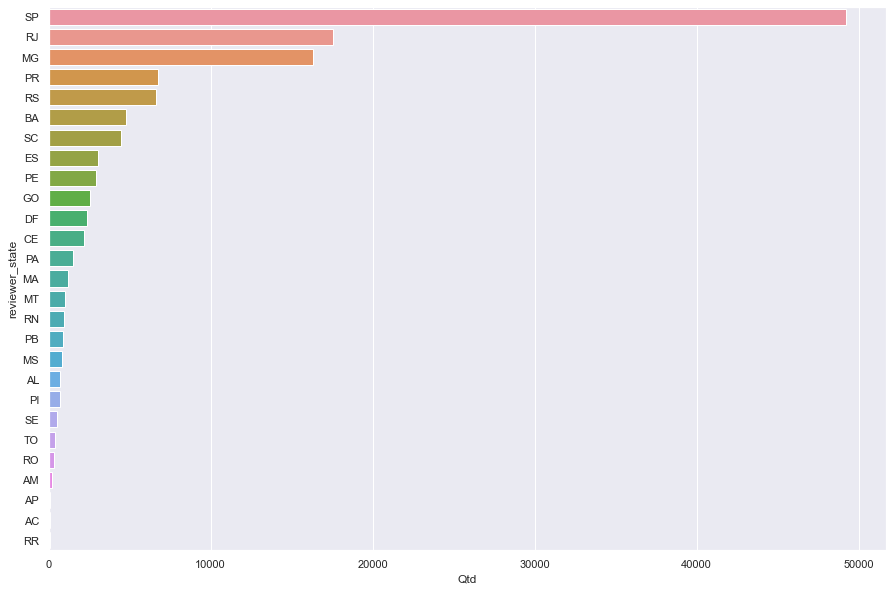

In [7]:
# Grafico feedback enviados por estados
sns.set(rc={"figure.figsize":(15, 10)})
sns.barplot(data=df_estados, y='reviewer_state', x='Qtd')

Como temos registros de varios estados por saber que cada estado tem um linguaguem um pouco diferente, escolhemos inicialmente desenvolver um modelo especifico para cada estado. Nesse trabalho escolhemos ES para desenvolver esse modelo

In [8]:
# Criando conjunto de dados somente com dados de ES
filtro  = df['reviewer_state'] == 'ES'
df_es = df[filtro]
df_es.head()
df_es = df_es.reset_index()

In [9]:
# Filtrando somente as colunas que vou utilizar para criar o modelo - coloca com comentarios escritos e a coluna target (positivo ou negativo)
df_es = df_es[['review_text','recommend_to_a_friend']]

In [10]:
# Analise distribuição do conjutno de dados
df_es['recommend_to_a_friend'].value_counts()

Yes    2200
No      852
Name: recommend_to_a_friend, dtype: int64

In [11]:
# tratando coluna target - positivo/recomenda o produto = 1 negativo/ não recomenda o produto = 0
df_es.loc[df_es['recommend_to_a_friend'] == 'Yes', 'recommend_to_a_friend'] = 1
df_es.loc[df_es['recommend_to_a_friend'] == 'No', 'recommend_to_a_friend'] = 0

Conjunto de dados desbalanceado, 72% dos dados são da classe Yes - 1 e 28% dos dados são da classe No - 0

In [12]:
df_es.to_csv('Dataset_nao_Lematizado_ES.csv',sep=';')

## Pré-processamento

Nessa etapa de pré processamento dos dados utilizadou tecnicas de tokenização, lematização e remoção de stop word para tratamentos dos dados

In [13]:
import nltk
nltk.download('punkt')
from nltk import tokenize 
nltk.download('stopwords')
stops = nltk.corpus.stopwords.words('portuguese')
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# Rotulando dos dados - etiquetando
def etiquetas(text):
    df = []
    for i in range(len(text['review_text'])):
        a = str(text['review_text'][i])
        b = text['recommend_to_a_friend'][i]
        c = (a,b)
        df.append(c)
    return df

In [15]:
dados = etiquetas(df_es)

In [16]:
dados[0]

('Pra quem gosta de qualidade com um preço acessível a todos, eis a melhor opção.',
 1)

Lematização

In [17]:
wnl = WordNetLemmatizer()

In [18]:
import spacy
#python -m spacy download pt_core_news_lg
nlp = spacy.load('pt_core_news_lg')

In [19]:
# Função para lematizar o conjunto de dados
def lema(string):
    doc1 = string.lower()
    doc = nlp(doc1)
    return [token.lemma_ for token in doc]

In [20]:
# aplicando função de lematização no conjunto de dados
dados_lematizado = []
for i in range(len(dados)):
    lematizar = lema(dados[i][0])
    classe = dados[i][1]
    dados_lematizado.append((lematizar, classe))

In [21]:
dados_lematizado[10]

(['dever',
  'vir',
  'com',
  'capar',
  'e',
  'película',
  'de',
  'proteção',
  ',',
  'o',
  'meu',
  'cair',
  'e',
  'quebrar',
  '.'],
 1)

Eliminando Stop Words

In [22]:
stops.append('Subject:')
stops.append('.')
stops.append('[')
stops.append("'")
stops.append(']')
stops.append(',')
stops.append(':')
stops.append('-')
stops.append('/')
stops.append('cc')
stops.append('|')
stops.append(')')
stops.append('(')
stops.append('+')
stops.append('-')
stops.append('\n')
stops.append('\n ')
stops.append('?')
stops.append('!')
stops.append('.')
stops.append('+/-')
stops.append('/-')
stops.append('/')
stops.append("   '")
stops.append('.')
stops.append('50')
stops.append('6')
stops.append('2')
stops.append(' ')
stops.append('.....')
stops.remove('não')


# Função para remoção de stop words
def removestopwords(text):
    frases = []
    for (palavras, classe) in text:
        # Estou colocando todos as palavras que não tem as stopwords nessa variavel
        semstops = [p for p in palavras if p not in stops]
        frases.append((semstops, classe))
    return frases

In [23]:
# Aplicando remoção de stopword no conjunto de dados
dados_semstps = removestopwords(dados_lematizado)

In [24]:
dados_semstps[50][0]

['chegar',
 'rápido',
 'tudo',
 'certo',
 'ótima',
 'loja',
 'cadeira',
 'bom',
 'bonito',
 'valer',
 'peno']

Ajustando Dados para Utilização do Modelo de Classificação

In [25]:
# Função para juntar palavras em uma unica sentença
def juntar_palavras(dados):
    array = dados
    result = [' '.join(array)]
    return result

In [26]:
# Aplicação da juntação juntar_palavras
palavras = []
for i in range(len(dados_semstps)):
    a = juntar_palavras(dados_semstps[i][0])
    palavras.append(a)

In [27]:
palavras[0]

['pra gostar qualidade preço acessível todo eis melhor opção']

Montando Data Set com os textos tratados

In [28]:
# Armazenando os textos tratados na variavel palavras_juntas
palavras_juntas = []
for i in range(len(palavras)):
    a = palavras[i][0]
    palavras_juntas.append(a)

In [29]:
# Armazenando target na variavel target
target = []
for i in range(len(dados_semstps)):
    a = dados_semstps[i][1]
    target.append(a)

In [30]:
# Criação do data set com os textos tratados
dic_ajustado_modelo = { 'Texto_tratado':palavras_juntas , 
                        'Target': target }

df_tratado = pd.DataFrame(dic_ajustado_modelo)
df_tratado.head()

,Texto_tratado,Target
0,pra gostar qualidade preço acessível todo eis ...,1
1,gostar cancelar comprar pedir suar gentileza i...,0
2,gostar produto valer peno comprar atender obje...,1
3,autoprograma facilitar parir ter dificuldade i...,1
4,terceirar motorola ter poder dizer amoooo,1


Após a criação do Data Set tratado, foi utilizado o metodo to_csv, para salvar o cojunto de dados. Foi realizado essa tecnicas para não ser preciso tratar novamente o conjunto de dados todas as vezes que eu fosse mexer no arquivo

In [31]:
df_tratado.to_csv('DataSetLematizado_ES.csv',sep=';')

In [32]:
# Importando conjunto de dados
df_tratado = pd.read_csv('DataSetLematizado_ES.csv',sep=';')

In [33]:
df_tratado.head()

,Unnamed: 0,Texto_tratado,Target
0,0,pra gostar qualidade preço acessível todo eis ...,1
1,1,gostar cancelar comprar pedir suar gentileza i...,0
2,2,gostar produto valer peno comprar atender obje...,1
3,3,autoprograma facilitar parir ter dificuldade i...,1
4,4,terceirar motorola ter poder dizer amoooo,1


## Modelagem

Como primeira etapada da modelo fazemos a vetorização dos textos, para isso utilizaremos a o metodo CountVectorizer da biblioteca do sklearn

In [34]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# O pré-processamento a seguir é feito para uso com o scikit-learn.
# A função entrega strings, tokens.
def preproc(sent):
    tokens = nltk.tokenize.word_tokenize(sent)
    tokens = [t.lower() for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stops]
    
    return ' '.join(tokens)

In [36]:
vetorizador = CountVectorizer(preprocessor=preproc)  # Cria o vetor de contagem
td = vetorizador.fit_transform(df_tratado['Texto_tratado'].values.astype('U'))  # Calcula o vocabulário e gera uma matriz Termos-Documentos
termos = vetorizador.get_feature_names()  # Gera uma lista dos atributos (i.e, do vocabulário)

C:\Users\Luciano\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
# Variaveis de entrada
X = td.toarray()

In [38]:
# Variaveis target
y = df_tratado['Target'].to_numpy()

In [39]:
len(X[0])

4358

## Separando dados de treino e dados de test - 80% Train 20% test

Nessa etapa o conjunto de dados sera separado em train e test. Porem como o conjunto de dados está desbalanceado, usaremos tecnicas de balacear o conjunto de dados de train.

In [40]:
## Separando dados de treino e dados de test - 80% Train 20% test
from sklearn.model_selection import train_test_split

input_train, input_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [41]:
# Utilizando metodo Random Under Sampler, para equilibrar conjunto de dados de train
from imblearn.under_sampling import RandomUnderSampler
input_resample_train , y_resample_train =RandomUnderSampler().fit_resample(input_train,y_train)

## Nave Bayes Bernoulli

Como primiera modelagem, estou usando o modelo nave bayes para analisar o desempenho. O modelo Nave bayes

In [42]:
from sklearn.naive_bayes import BernoulliNB

#Calling the Class
naive_bayes = BernoulliNB()
 
#Fitting the data to the classifier
naive_bayes.fit(input_resample_train , y_resample_train)
 
#Predict on test data
y_predicted = naive_bayes.predict(input_test)

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Analisando resultados do modelo

In [44]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       171
           1       0.89      0.89      0.89       440

    accuracy                           0.84       611
   macro avg       0.80      0.80      0.80       611
weighted avg       0.84      0.84      0.84       611



In [45]:
print(confusion_matrix(y_test, y_predicted))

[[123  48]
 [ 50 390]]


Como resultado o modelo Naves Bayes apresentou 84% de acuracia

## Redes Neurais Bert

Foi utilizado abordagem com redes neurais - bert também, para verificar se tinha um desempenhar melhor do que o modelo Naves Bayes.
No caso das redes bert, foi modelado 2 modelos, 1 usando bert + modelo de regressão logistica, e outro usando bert + redes neurais recorrentes

In [34]:
#df = pd.read_csv('Dataset_nao_Lematizado_ES.csv',sep=';')

In [4]:
df= df_tratado[['Texto_tratado','Target']]
#df= df[['review_text','recommend_to_a_friend']]

df.head()

,Texto_tratado,Target
0,pra gostar qualidade preço acessível todo eis ...,1
1,gostar cancelar comprar pedir suar gentileza i...,0
2,gostar produto valer peno comprar atender obje...,1
3,autoprograma facilitar parir ter dificuldade i...,1
4,terceirar motorola ter poder dizer amoooo,1


Importando bibliotecas

In [5]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

In [6]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [7]:
PRE_TRAINED_MODEL_NAME = 'neuralmind/bert-large-portuguese-cased'

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Some weights of the model checkpoint at neuralmind/bert-large-portuguese-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
#Preparando os dados para o BERT
tokenized = df['Texto_tratado'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [9]:
tokenized[5]

[101, 7184, 9887, 8977, 13239, 9466, 934, 102]

In [10]:
#Padronizando todas as entradas para que tenham o mesmo tamanho
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [11]:
# Criando variaveis de entrada e target
features = padded
labels = df['Target']

In [12]:
## Separando dados de treino e dados de test - 80% Train 20% test
from sklearn.model_selection import train_test_split

In [13]:
## Separando dados de treino e dados de test - 80% Train 20% test
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=.2)

In [14]:
# Utilizando metodo Random Under Sampler, para equilibrar conjunto de dados de train
from imblearn.under_sampling import RandomUnderSampler
input_resample_train , y_resample_train =RandomUnderSampler().fit_resample(train_features,train_labels)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Criando modelo de regressão logistica para ser aplicado depois do bert

In [27]:
lr = LogisticRegression()

lr.fit(input_resample_train, y_resample_train)

#Predict on test data
y_predicted = lr.predict(test_features)

C:\Users\Luciano\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resultados modelo bert + regressão logistica

In [28]:
print(classification_report(test_labels, y_predicted))

              precision    recall  f1-score   support

           0       0.45      0.59      0.51       150
           1       0.85      0.77      0.81       461

    accuracy                           0.72       611
   macro avg       0.65      0.68      0.66       611
weighted avg       0.75      0.72      0.73       611



Criando rede neural recorrente para ser utilizada depois do bert

In [16]:
from keras.layers import SimpleRNN, Embedding, Dense , SpatialDropout1D
from keras.models import Sequential
from tensorflow.keras import optimizers
import tensorflow as tf


# O número máximo de palavras a serem usadas. (mais frequente) 
MAX_NB_WORDS = 100000
# Número máximo de palavras em cada reclamação. 
MAX_SEQUENCE_LENGTH = 100000
# Isso foi corrigido. 
EMBEDDING_DIM = 64

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=features.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# treinamento do modelo com 10 epocas
epochs = 10
batch_size = 16 #514

history = model.fit(input_resample_train, y_resample_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
88/88 [==============================] - 54s 540ms/step - loss: 0.6951 - accuracy: 0.5075
Epoch 2/10
88/88 [==============================] - 45s 513ms/step - loss: 0.6279 - accuracy: 0.6342
Epoch 3/10
88/88 [==============================] - 45s 515ms/step - loss: 0.5472 - accuracy: 0.7663
Epoch 4/10
88/88 [==============================] - 46s 522ms/step - loss: 0.5185 - accuracy: 0.7772
Epoch 5/10
88/88 [==============================] - 46s 519ms/step - loss: 0.3705 - accuracy: 0.8774
Epoch 6/10
88/88 [==============================] - 48s 541ms/step - loss: 0.3407 - accuracy: 0.8915
Epoch 7/10
88/88 [==============================] - 46s 519ms/step - loss: 0.3493 - accuracy: 0.8862
Epoch 8/10
88/88 [==============================] - 47s 539ms/step - loss: 0.2733 - accuracy: 0.9203
Epoch 9/10
88/88 [==============================] - 48s 544ms/step - loss: 0.2325 - accuracy: 0.9364
Epoch 10/10
88/88 [==============================] - 46s 522ms/step - loss: 0.3660 - accura

Analisando os resultados

In [18]:
avaliacao = model.evaluate(test_features,test_labels)

20/20 [==============================] - 4s 121ms/step - loss: 0.4824 - accuracy: 0.8234


## Conclusão

Para esse case foi densenvolvido modelos envolvendo tecnicas de machine learning (nave bayes) e tecnicas de deep learning (bert + regressão logistica e bert + redes neurais recorrentes.

Os modelos nave bayes e bert + redes neurais recorrentes apresentaram melhores resultados de acuracia onde, obtiveram 82% nos dados de treino

## Deploy do Modelo

Nesta etapa sera salvo os arquivos que sera utilizados como base para criação da api, para o deploy do modelo

In [48]:
# Salvando modelo naves bayes
import joblib

joblib.dump(naive_bayes, 'model.pkl')

['model.pkl']

In [50]:
# Salvando dicionario de palavras
with open('Dicionario_palavras.txt','w') as arquivo:
    for palavra in termos:
        arquivo.write("'" + str(palavra) + "'" + ",")

In [51]:
# Salvando stops words
with open('Stops_words.txt','w') as arquivo:
    for palavra in stops:
        arquivo.write("'" + str(palavra) + "'" + ",")